## Unüberwachte Lernverfahren

Unüberwachte Lernverfahren ermitteln die *intrinsische Struktur* von Daten. Sie benötigen keine Trainingsdaten und sind unvoreingenommen.

### Iris-Clustering

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
import pandas as pd
idf = pd.DataFrame(iris["data"], columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
idf["target"] = iris["target"]
idf["name"] = [iris["target_names"][target] for target in iris["target"]]
idf

,Sepal Length,Sepal Width,Petal Length,Petal Width,target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Du kannst die Iris-Daten auch clustern. Die meisten Cluster-Algorithmen brauchen als Vorgabe die Anzahl der Cluster, so auch das hier verwendete `KMeans`. Versuche es erst mit einer "falschen" Anzahl an Clustern:

In [3]:
from sklearn.cluster import KMeans
km5 = KMeans(n_clusters=5)
km5.fit(iris['data'])

KMeans(n_clusters=5)

In dem `labels_`-Feld stehen dir jetzt die entdecken Cluster zur Verfügung:

In [4]:
km5.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 4, 1, 1, 4, 2, 4, 1, 4,
       1, 1, 1, 3, 1, 1, 1, 4, 4, 3, 1, 3, 4, 3, 1, 4, 3, 3, 1, 4, 4, 4,
       1, 3, 3, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

Schau dir zum Vergleich die echten Varianten an:

In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Die Zahlen sind beliebig. Am Anfang hat es noch ganz gut geklappt - aber dann gibt es schon ein ziemliches Durcheinander!

Oben hattet du gesehen, dass sich die Iris-Varianten am besten durch die *Petal Length* vs. *Sepal Length* unterscheiden lassen. Mit `seaborn` kannst du einen Scatter-Plot zeichnen lassen und sowohl die Marker als auch die Farben beeinflussen. Wenn du die Marker auf die echte Spezies setzt und die Farben auf die Cluster, siehst du, was nicht richtig gelöst wurde:

<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Length'>

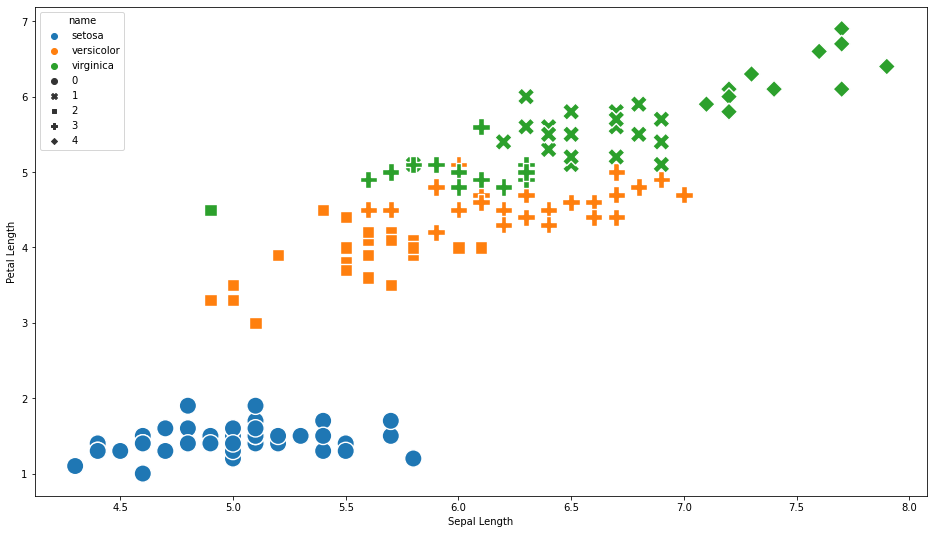

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
sns.scatterplot(x=idf["Sepal Length"], y=idf["Petal Length"], hue=idf["name"], style=km5.labels_, 
                s=300)

Versuch es nochmal mit der richtigen Anzahl der Cluster:

In [7]:
km3 = KMeans(n_clusters=3)
km3.fit(iris['data'])
km3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Das Ergebnis sieht jetzt auch optisch sehr viel besser aus:

<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Length'>

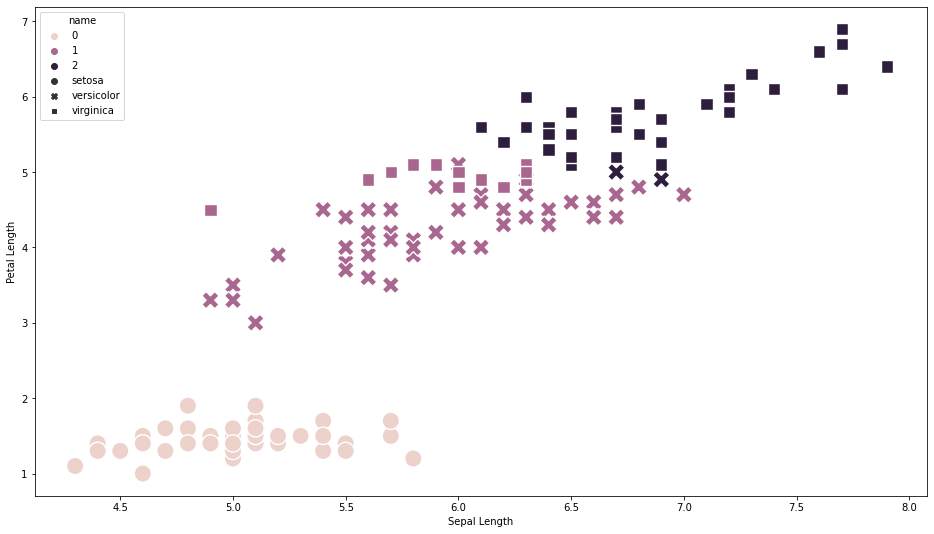

In [8]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=idf["Sepal Length"], y=idf["Petal Length"], hue=km3.labels_, style=idf["name"], 
                s=300)

Ein Clusterverfahren wie `MeanShift` ermittelt die Anzahl der Cluster selbstständig:

In [9]:
from sklearn.cluster import MeanShift
ms = MeanShift()
ms.fit(iris['data'])

MeanShift()

<AxesSubplot:xlabel='Sepal Length', ylabel='Petal Length'>

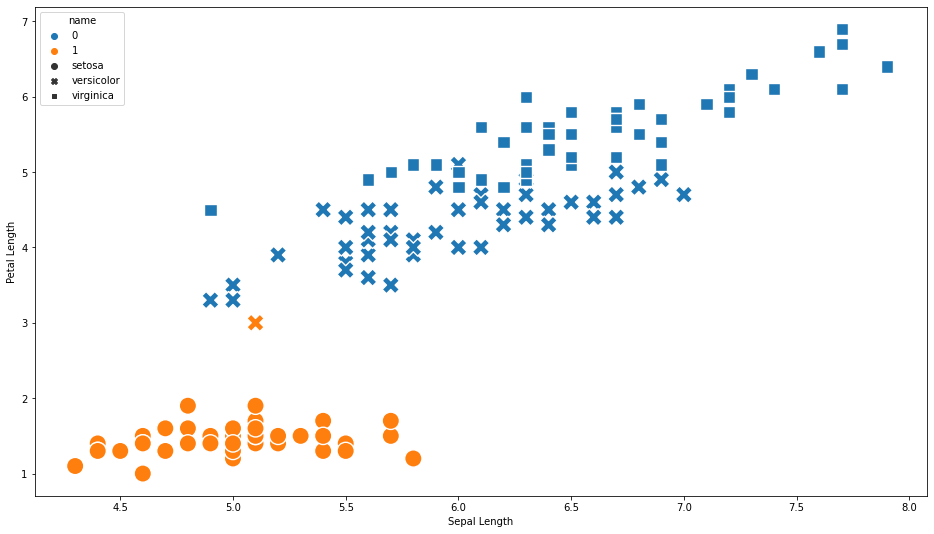

In [10]:
plt.figure(figsize=(16,9))
sns.scatterplot(x=idf["Sepal Length"], y=idf["Petal Length"], hue=ms.labels_, style=idf["name"], 
                s=300)

Mithilfe des Silhouette-Scores kannst du ermitteln, wie gut das Clustering (für *konvexe Cluster*) funktioniert hat:

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(iris['data'], km3.labels_)

0.5528190123564091

In [12]:
silhouette_score(iris['data'], km5.labels_)

0.4887488870931048

In [13]:
silhouette_score(iris['data'], ms.labels_)

0.685788171261719

Innerhalb des gleichen Cluster-Verfahrens kannst du den Silhouette-Score gut vergleichen. `MeanShift` hat nach dem Bild oben natürlich auch gute Argument, warum es nur zwei Cluster gefunden hat. Vermutliche sind sich Spezies in dem "oberen" Cluster auch deutlich ähnlicher!

### Reddit-Topic Models

Topic-Modelle kann `scikit-learn` mit mehreren Methoden berechnen. `NMF` ist deutlich schneller als `LDA` und hat häufig ebenso gute Ergebnisse.

Die Aufrufe sind sehr ähnlich zum Clustering und zur Klassifikation:

In [14]:
docs = pd.read_csv("reddit-technology-toplevel-title.csv.xz", parse_dates=["created_utc"])

In [15]:
stop_words= {"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 
             'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 
             'amongst', 'amount', 'amp', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 
             'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 
             'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 
             'beyond', 'blog', 'body', 'both', 'bottom', 'but', 'buy', 'buycheap', 'by', 'ca', 'call', 'can', 'cannot', 
             'case', 'change', 'co', 'com', 'could', 'create', 'delete', 'did', 'do', 'does', 'doing', 'done', 'down', 
             'download', 'drive', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'email', 
             'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 
             'fifteen', 'fifty', 'first', 'five', 'fix', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 
             'full', 'further', 'get', 'give', 'go', 'good', 'had', 'has', 'have', 'he', 'help', 'hence', 'her', 'here', 
             'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 
             'http', 'https', 'hundred', 'i', 'if', 'in', 'indeed', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 
             'last', 'late', 'latter', 'latterly', 'least', 'less', 'll', 'look', 'made', 'make', 'many', 'market', 'may', 
             'me', 'meanwhile', 'message', 'might', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 
             'must', 'my', 'myself', "n't", 'name', 'namely', 'need', 'neither', 'never', 'nevertheless', 'new', 'news', 
             'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'number', 'n‘t', 
             'n’t', 'of', 'off', 'often', 'on', 'once', 'one', 'online', 'only', 'onto', 'or', 'other', 'others', 
             'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'page', 'part', 'pass', 'per', 'perhaps', 
             'please', 'post', 'put', 'question', 'quite', 'rather', 're', 'really', 'reddit', 'regarding', 'remove', 
             'review', 'same', 'say', 'search', 'see', 'seem', 'seemed', 'seeming', 'seems', 'self', 'send', 'serious', 
             'several', 'she', 'should', 'show', 'side', 'since', 'site', 'six', 'sixty', 'so', 'some', 'somehow', 
             'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'support', 'take', 'ten', 
             'test', 'text', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'third', 'this', 'those', 
             'though', 'three', 'through', 'throughout', 'thru', 'thus', 'time', 'to', 'together', 'too', 'top', 
             'toward', 'towards', 'twelve', 'twenty', 'two', 'under', 'unless', 'unlock', 'until', 'up', 'upon', 
             'us', 'use', 'used', 'using', 'various', 've', 'very', 'via', 'video', 'was', 'watch', 'way', 'we', 'well', 
             'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 
             'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'work', 'would', 'yet', 'you', 'your', 
             'yours', 'yourself', 'yourselves', '‘d', '‘ll', '‘m', '‘re', '‘s', '‘ve', '’d', '’ll', '’m', '’re', 
             '’s', '’ve'}

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10, stop_words=stop_words)
tfidf_vectors = tfidf_vectorizer.fit_transform(docs["title"].map(str))
tfidf_vectors

<1922041x44978 sparse matrix of type '<class 'numpy.float64'>'
	with 11397513 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.decomposition import NMF

num_topics = 10

nmf = NMF(n_components = num_topics)
nmf.fit(tfidf_vectors)

/home/cwinkler/.venv/jupyter-new/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=10)

Um die Ergebnisse darzustellen, wollen wir Wordclouds benutzen. Dazu berechnest du die wichtigsten Wörter in jedem einzelnen Topic:

In [18]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud_topic_model_summary(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        freq = { feature_names[i]: topic[i] for i in topic.argsort()[:-no_top_words - 1:-1] }
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(freq)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')

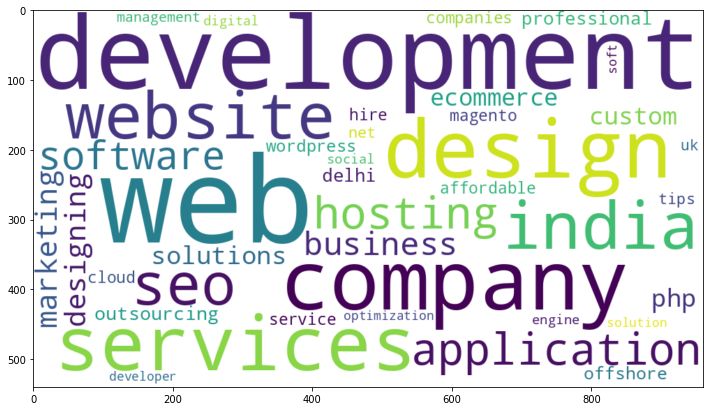

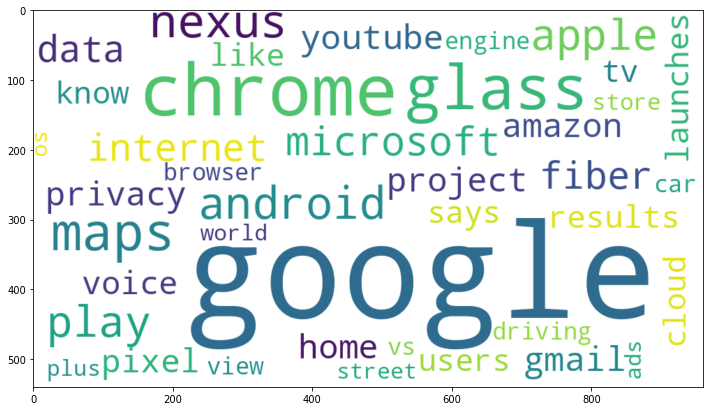

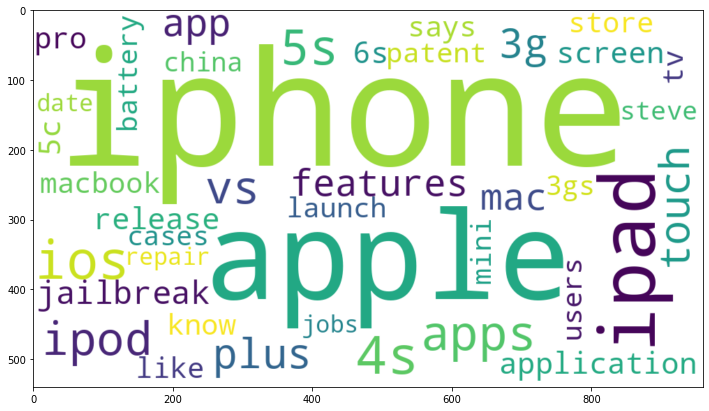

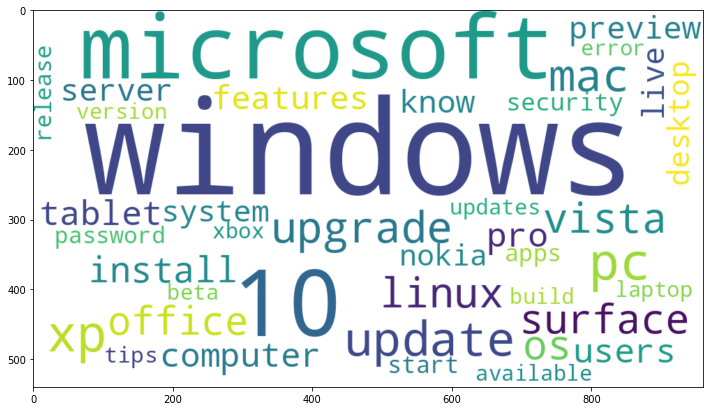

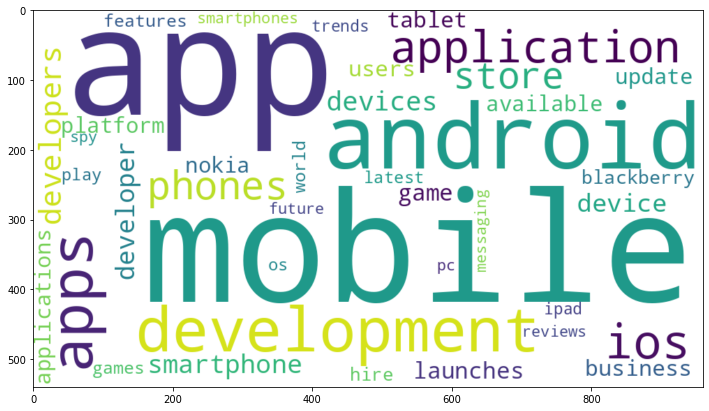

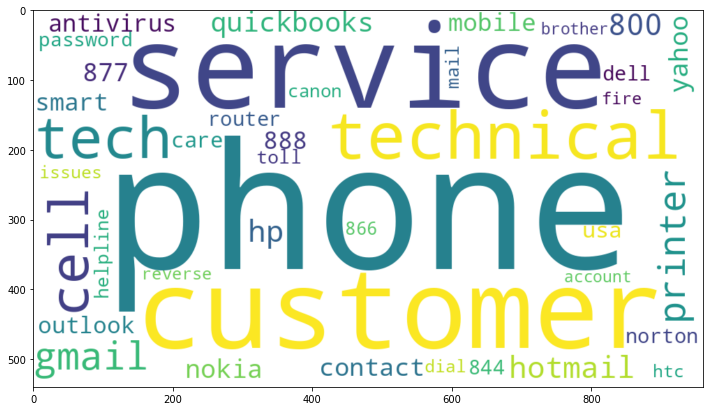

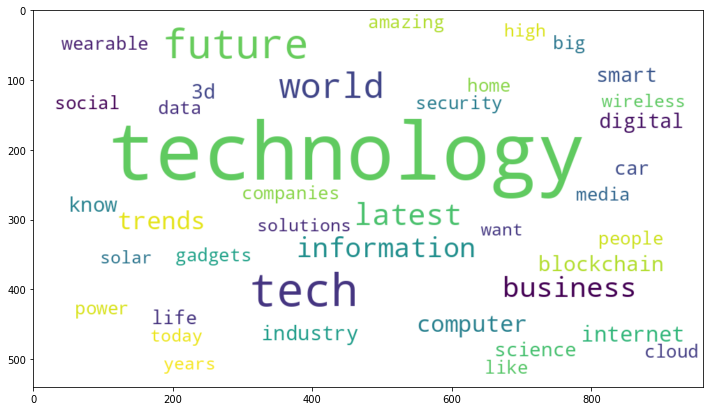

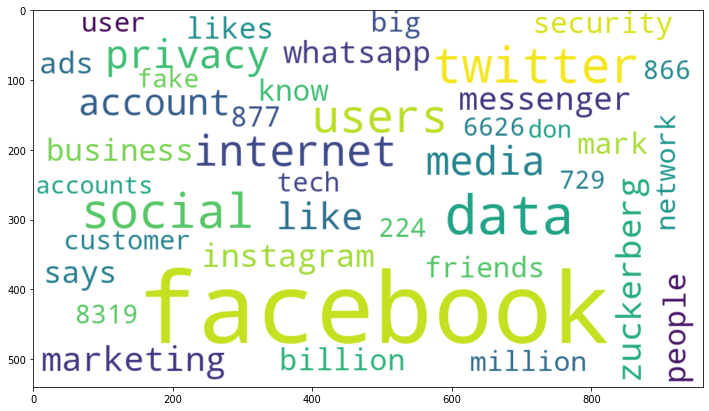

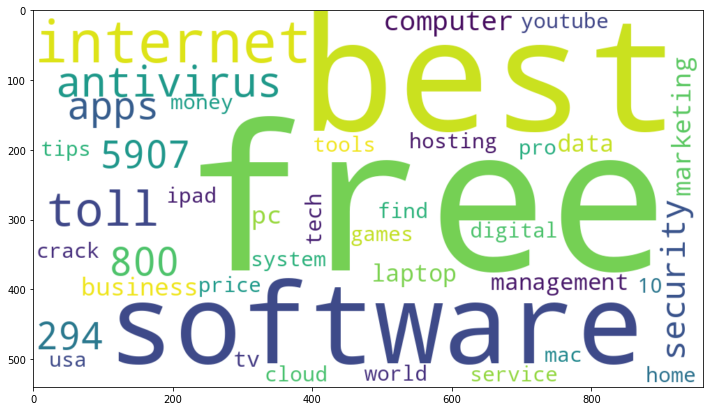

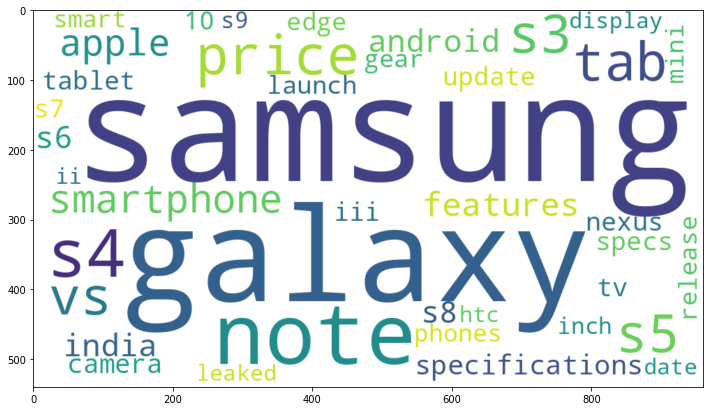

In [19]:
wordcloud_topic_model_summary(nmf, tfidf_vectorizer.get_feature_names(), 40)

Das Ergebnis ist gut interpretierbar und vor allem *unvoreingenommen*. Mit wenigen Zeilen Code hast du so die Themen in zwei Millionen Posts bestimmt!

Die Anzahl der Topics kannst du variieren und sehen, ob du damit bessere Ergebnisse erzielen kannst. Es gibt auch Scores, mit denen du die Güte ermitteln kannst (Coherence Score oder Perlexity).